In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read the dataset

In [2]:
# Read in the data
EDA_path="20230412_EDA_dataset.csv"
daily_active_apps_path="daily_active_apps.csv"
df_EDA=pd.read_csv(EDA_path)
df_EDA=df_EDA.iloc[:, 1:]
df_apps=pd.read_csv(daily_active_apps_path)

In [3]:
df_EDA.head()

,organisation_id,partner_id,distributor_id,size,size_range_mean,is_partner_org,industry_code,industry_name,certificate_id,certificate_type,...,V5,DISTRIBUTOR,LEGACY,FIF2,IASME,PLAN,LTT,LTT2,COPY2,CE
0,7780,585,246,100-249 EMPLOYEES,175,0,MANU,Manufacturing,32818.0,CYBER ESSENTIALS,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,28266,8341,1,2-4 EMPLOYEES,3,1,MSIT,Managed Services - IT Managed Services,43626.0,CYBER ESSENTIALS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1189,372,1,5-9 EMPLOYEES,7,1,ITEC,Information Technology,40268.0,CYBER ESSENTIALS,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,27462,2265,1,35-49 EMPLOYEES,42,0,OTHE,Other (please describe),41672.0,CYBER ESSENTIALS PLUS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,27462,2265,1,35-49 EMPLOYEES,42,0,OTHE,Other (please describe),41671.0,CYBER ESSENTIALS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
df_apps

,DATE_DAY,ORGANISATION_ID,ACTIVE_APPS
0,11/04/2023,28298,2
1,10/04/2023,28298,2
2,09/04/2023,28298,2
3,08/04/2023,28298,2
4,07/04/2023,28298,2
...,...,...,...
119577,20/02/2023,18820,27
119578,19/02/2023,18820,27
119579,18/02/2023,18820,27
119580,17/02/2023,18820,27


In [5]:
count = df_EDA.nunique()
print(count.to_string())


organisation_id             6521
partner_id                   964
distributor_id                20
size                          10
size_range_mean               10
is_partner_org                 2
industry_code                 55
industry_name                 55
certificate_id             13339
certificate_type               5
certificate_year               7
certificate_status_name       10
is_current_status              2
status_valid_from          14714
days_since_status           1055
time_to_certified            159
plan_name                     73
subscriptions_status           4
period_months                  4
DIRECT                         2
CAP                            2
V3                             2
V6                             2
BASIC                          2
CEP                            2
GDPR                           2
PRO                            2
PARTNER                        2
CERT                           2
OS                             2
COPY1     

In [6]:
count = df_apps.nunique()
print(count.to_string())

DATE_DAY             55
ORGANISATION_ID    2262
ACTIVE_APPS         393


# Analyze the daily active apps

In [7]:
import pandas as pd
from dython.nominal import associations

In [8]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df_apps)
categorical_features

['DATE_DAY']

In [9]:
df_correlation=df_apps

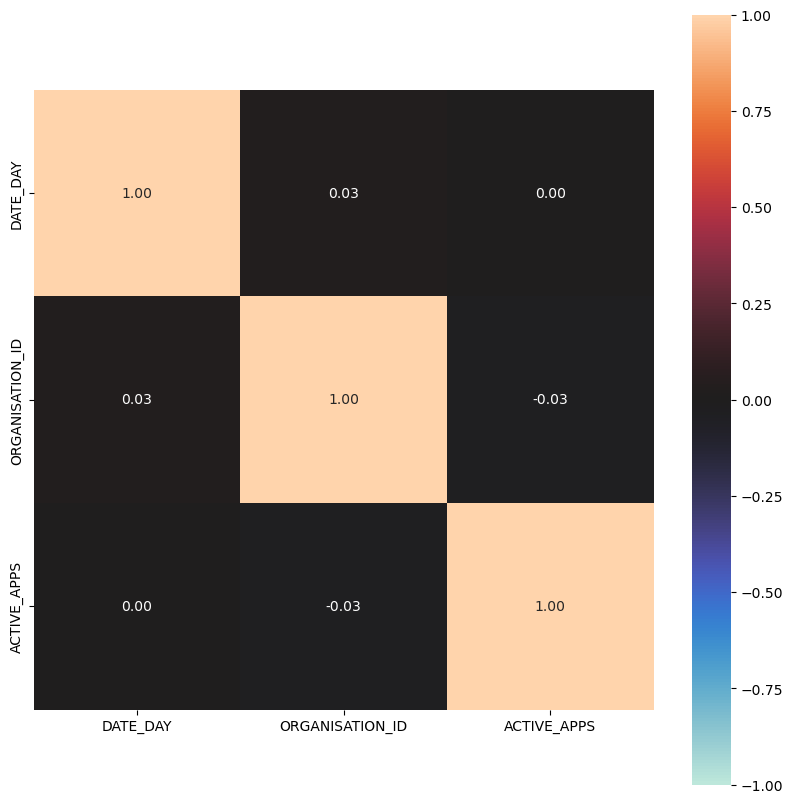

C:\Users\1\AppData\Local\Temp\ipykernel_11040\841977965.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr=df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',


,DATE_DAY,ORGANISATION_ID,ACTIVE_APPS
DATE_DAY,1.00,0.03,0.00
ORGANISATION_ID,0.03,1.00,-0.03
ACTIVE_APPS,0.00,-0.03,1.00


In [10]:
complete_correlation= associations(df_apps, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr=complete_correlation['corr']
df_corr=df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',
axis=None).set_precision(2)
df_corr

It can be seen from the figure that the correlation between the three variables is very small, so it is difficult to find the rule between the variables.



# Analyze 20230412_EDA_dataset

In [11]:
categorical_features=identify_nominal_columns(df_apps)
categorical_features

['DATE_DAY']

In [12]:
df_correlation=df_EDA

D:\anaconda3\lib\site-packages\dython\nominal.py:293: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(
D:\anaconda3\lib\site-packages\dython\nominal.py:293: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(


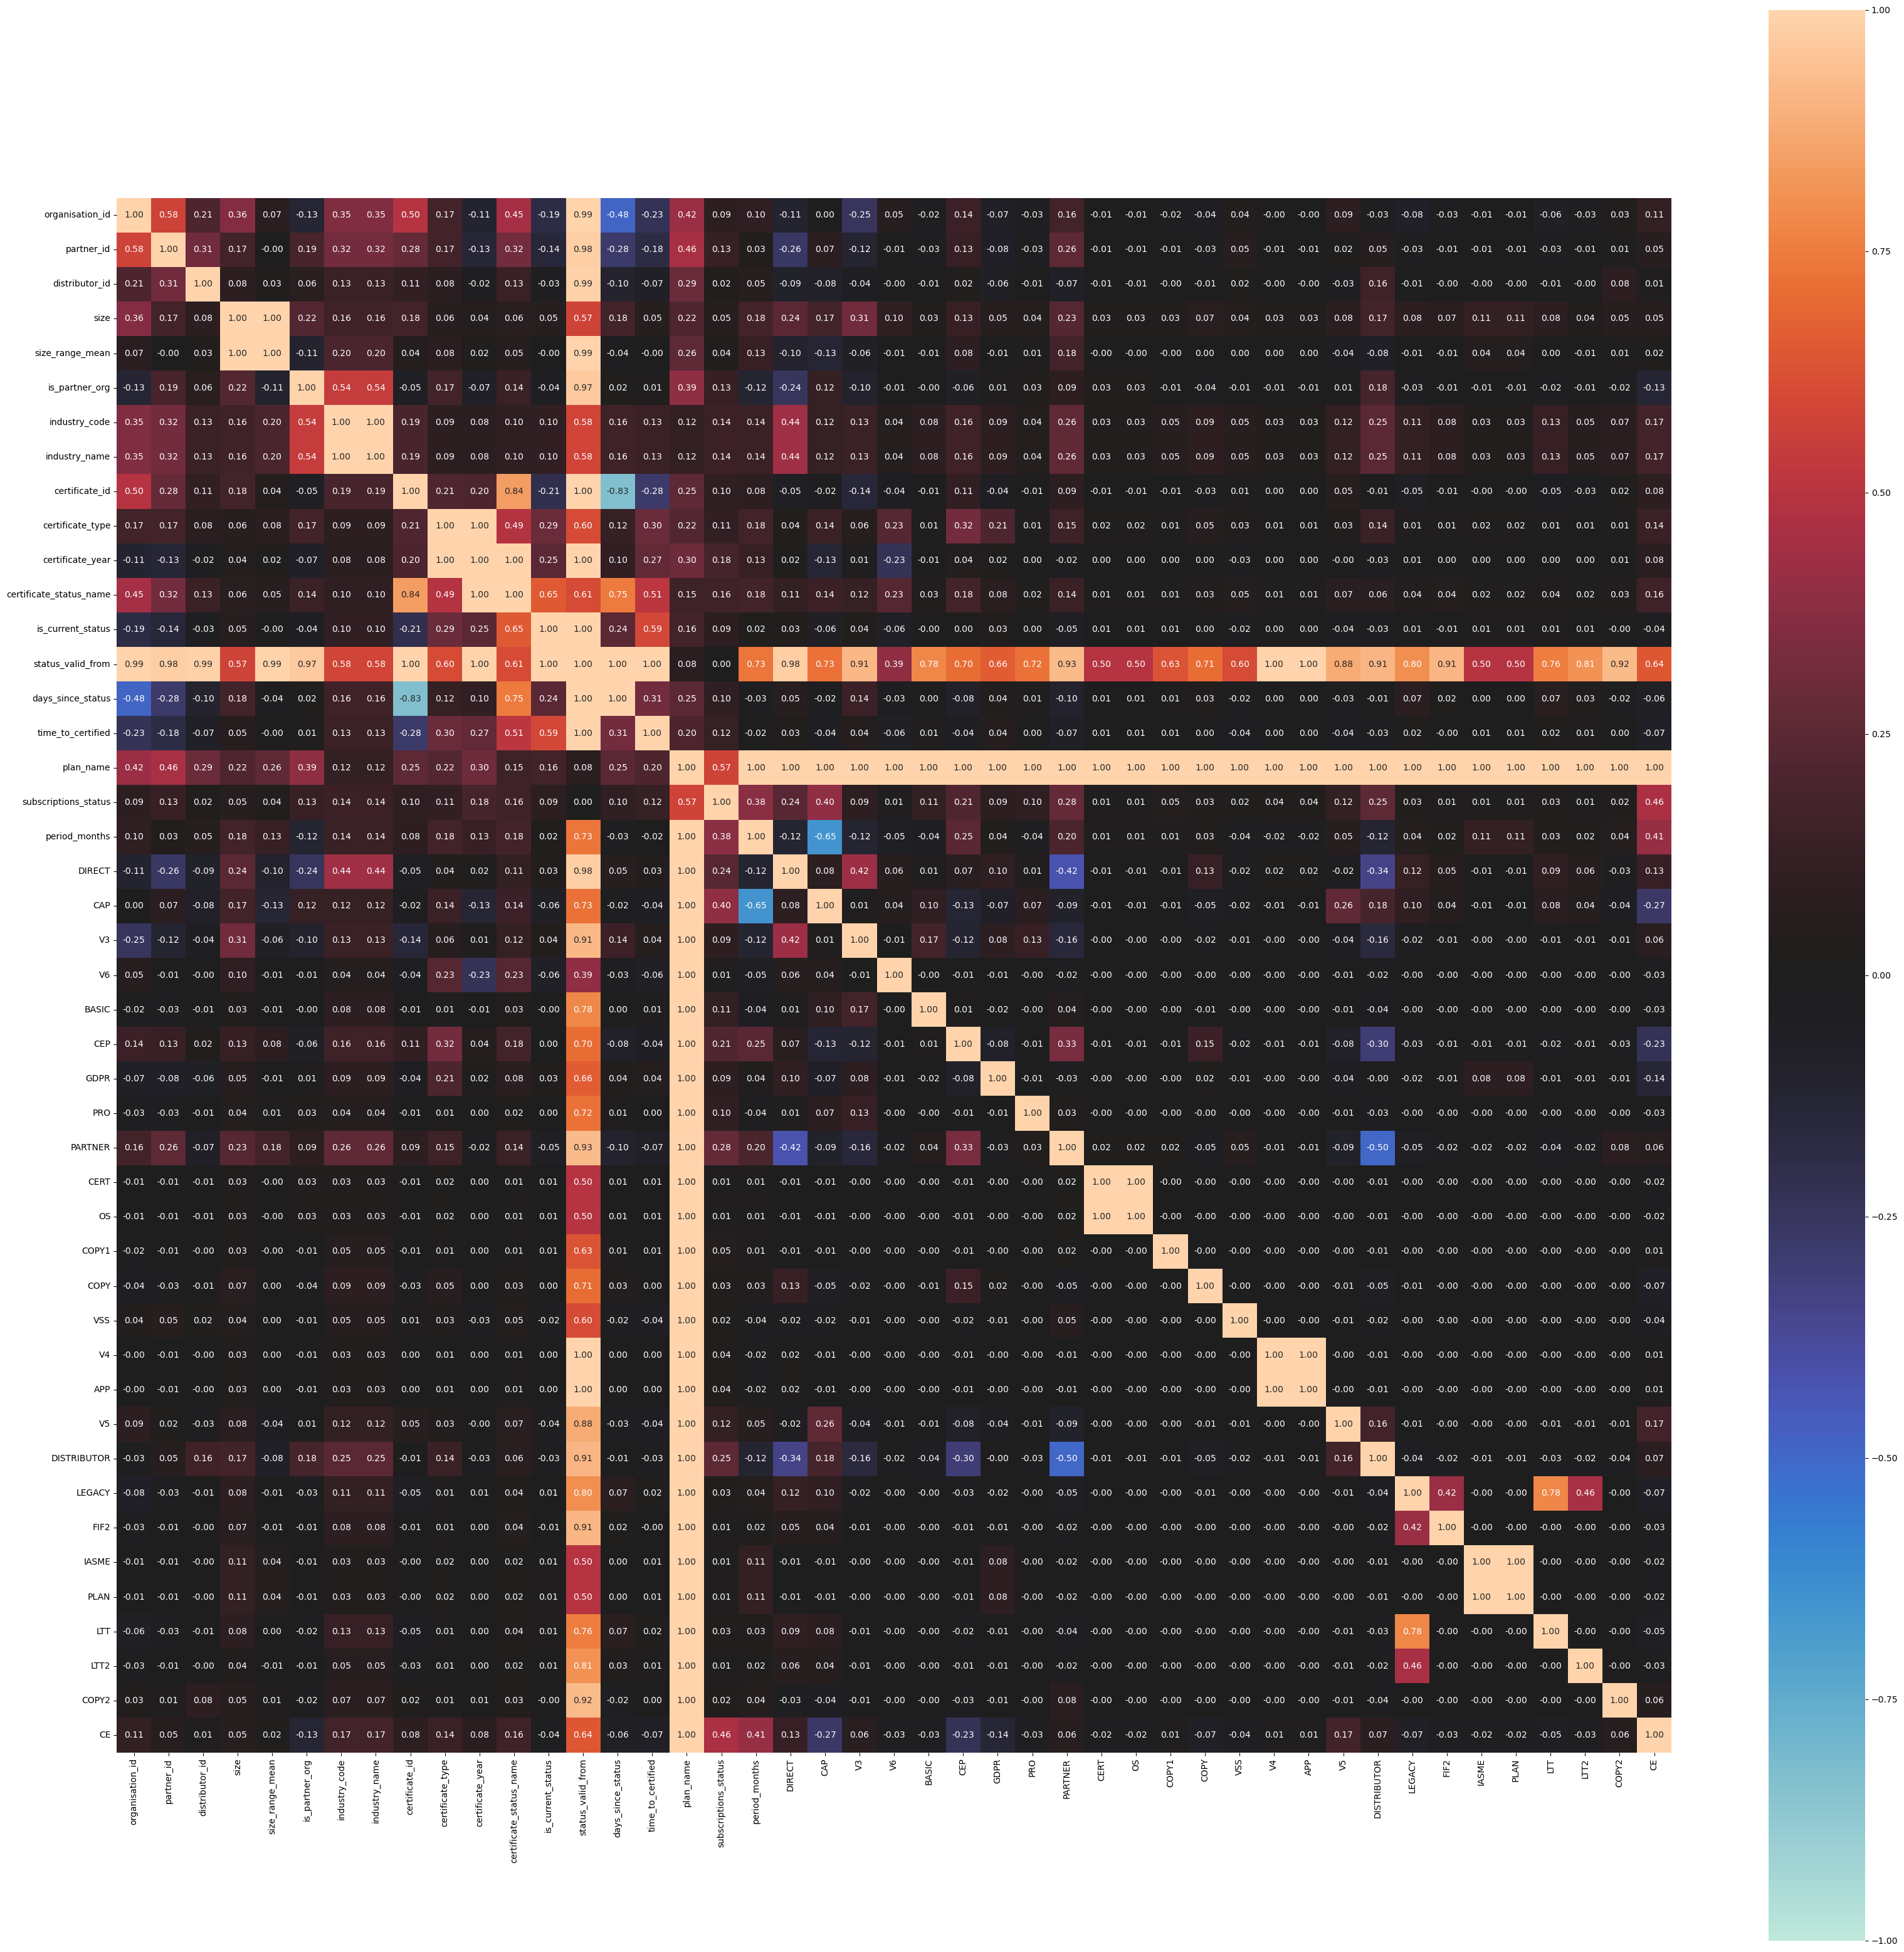

C:\Users\1\AppData\Local\Temp\ipykernel_11040\1692971634.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr=df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='RdBu',


,organisation_id,partner_id,distributor_id,size,size_range_mean,is_partner_org,industry_code,industry_name,certificate_id,certificate_type,certificate_year,certificate_status_name,is_current_status,status_valid_from,days_since_status,time_to_certified,plan_name,subscriptions_status,period_months,DIRECT,CAP,V3,V6,BASIC,CEP,GDPR,PRO,PARTNER,CERT,OS,COPY1,COPY,VSS,V4,APP,V5,DISTRIBUTOR,LEGACY,FIF2,IASME,PLAN,LTT,LTT2,COPY2,CE
organisation_id,1.00,0.58,0.21,0.36,0.07,-0.13,0.35,0.35,0.50,0.17,-0.11,0.45,-0.19,0.99,-0.48,-0.23,0.42,0.09,0.10,-0.11,0.00,-0.25,0.05,-0.02,0.14,-0.07,-0.03,0.16,-0.01,-0.01,-0.02,-0.04,0.04,-0.00,-0.00,0.09,-0.03,-0.08,-0.03,-0.01,-0.01,-0.06,-0.03,0.03,0.11
partner_id,0.58,1.00,0.31,0.17,-0.00,0.19,0.32,0.32,0.28,0.17,-0.13,0.32,-0.14,0.98,-0.28,-0.18,0.46,0.13,0.03,-0.26,0.07,-0.12,-0.01,-0.03,0.13,-0.08,-0.03,0.26,-0.01,-0.01,-0.01,-0.03,0.05,-0.01,-0.01,0.02,0.05,-0.03,-0.01,-0.01,-0.01,-0.03,-0.01,0.01,0.05
distributor_id,0.21,0.31,1.00,0.08,0.03,0.06,0.13,0.13,0.11,0.08,-0.02,0.13,-0.03,0.99,-0.10,-0.07,0.29,0.02,0.05,-0.09,-0.08,-0.04,-0.00,-0.01,0.02,-0.06,-0.01,-0.07,-0.01,-0.01,-0.00,-0.01,0.02,-0.00,-0.00,-0.03,0.16,-0.01,-0.00,-0.00,-0.00,-0.01,-0.00,0.08,0.01
size,0.36,0.17,0.08,1.00,1.00,0.22,0.16,0.16,0.18,0.06,0.04,0.06,0.05,0.57,0.18,0.05,0.22,0.05,0.18,0.24,0.17,0.31,0.10,0.03,0.13,0.05,0.04,0.23,0.03,0.03,0.03,0.07,0.04,0.03,0.03,0.08,0.17,0.08,0.07,0.11,0.11,0.08,0.04,0.05,0.05
size_range_mean,0.07,-0.00,0.03,1.00,1.00,-0.11,0.20,0.20,0.04,0.08,0.02,0.05,-0.00,0.99,-0.04,-0.00,0.26,0.04,0.13,-0.10,-0.13,-0.06,-0.01,-0.01,0.08,-0.01,0.01,0.18,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.04,-0.08,-0.01,-0.01,0.04,0.04,0.00,-0.01,0.01,0.02
is_partner_org,-0.13,0.19,0.06,0.22,-0.11,1.00,0.54,0.54,-0.05,0.17,-0.07,0.14,-0.04,0.97,0.02,0.01,0.39,0.13,-0.12,-0.24,0.12,-0.10,-0.01,-0.00,-0.06,0.01,0.03,0.09,0.03,0.03,-0.01,-0.04,-0.01,-0.01,-0.01,0.01,0.18,-0.03,-0.01,-0.01,-0.01,-0.02,-0.01,-0.02,-0.13
industry_code,0.35,0.32,0.13,0.16,0.20,0.54,1.00,1.00,0.19,0.09,0.08,0.10,0.10,0.58,0.16,0.13,0.12,0.14,0.14,0.44,0.12,0.13,0.04,0.08,0.16,0.09,0.04,0.26,0.03,0.03,0.05,0.09,0.05,0.03,0.03,0.12,0.25,0.11,0.08,0.03,0.03,0.13,0.05,0.07,0.17
industry_name,0.35,0.32,0.13,0.16,0.20,0.54,1.00,1.00,0.19,0.09,0.08,0.10,0.10,0.58,0.16,0.13,0.12,0.14,0.14,0.44,0.12,0.13,0.04,0.08,0.16,0.09,0.04,0.26,0.03,0.03,0.05,0.09,0.05,0.03,0.03,0.12,0.25,0.11,0.08,0.03,0.03,0.13,0.05,0.07,0.17
certificate_id,0.50,0.28,0.11,0.18,0.04,-0.05,0.19,0.19,1.00,0.21,0.20,0.84,-0.21,1.00,-0.83,-0.28,0.25,0.10,0.08,-0.05,-0.02,-0.14,-0.04,-0.01,0.11,-0.04,-0.01,0.09,-0.01,-0.01,-0.01,-0.03,0.01,0.00,0.00,0.05,-0.01,-0.05,-0.01,-0.00,-0.00,-0.05,-0.03,0.02,0.08
certificate_type,0.17,0.17,0.08,0.06,0.08,0.17,0.09,0.09,0.21,1.00,1.00,0.49,0.29,0.60,0.12,0.30,0.22,0.11,0.18,0.04,0.14,0.06,0.23,0.01,0.32,0.21,0.01,0.15,0.02,0.02,0.01,0.05,0.03,0.01,0.01,0.03,0.14,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.14


In [15]:
complete_correlation= associations(df_EDA, filename= 'complete_correlation.png', figsize=(40,40))
df_complete_corr=complete_correlation['corr']
df_complete_corr=complete_correlation['corr']
df_corr=df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='RdBu',
axis=None).set_precision(2)
df_corr

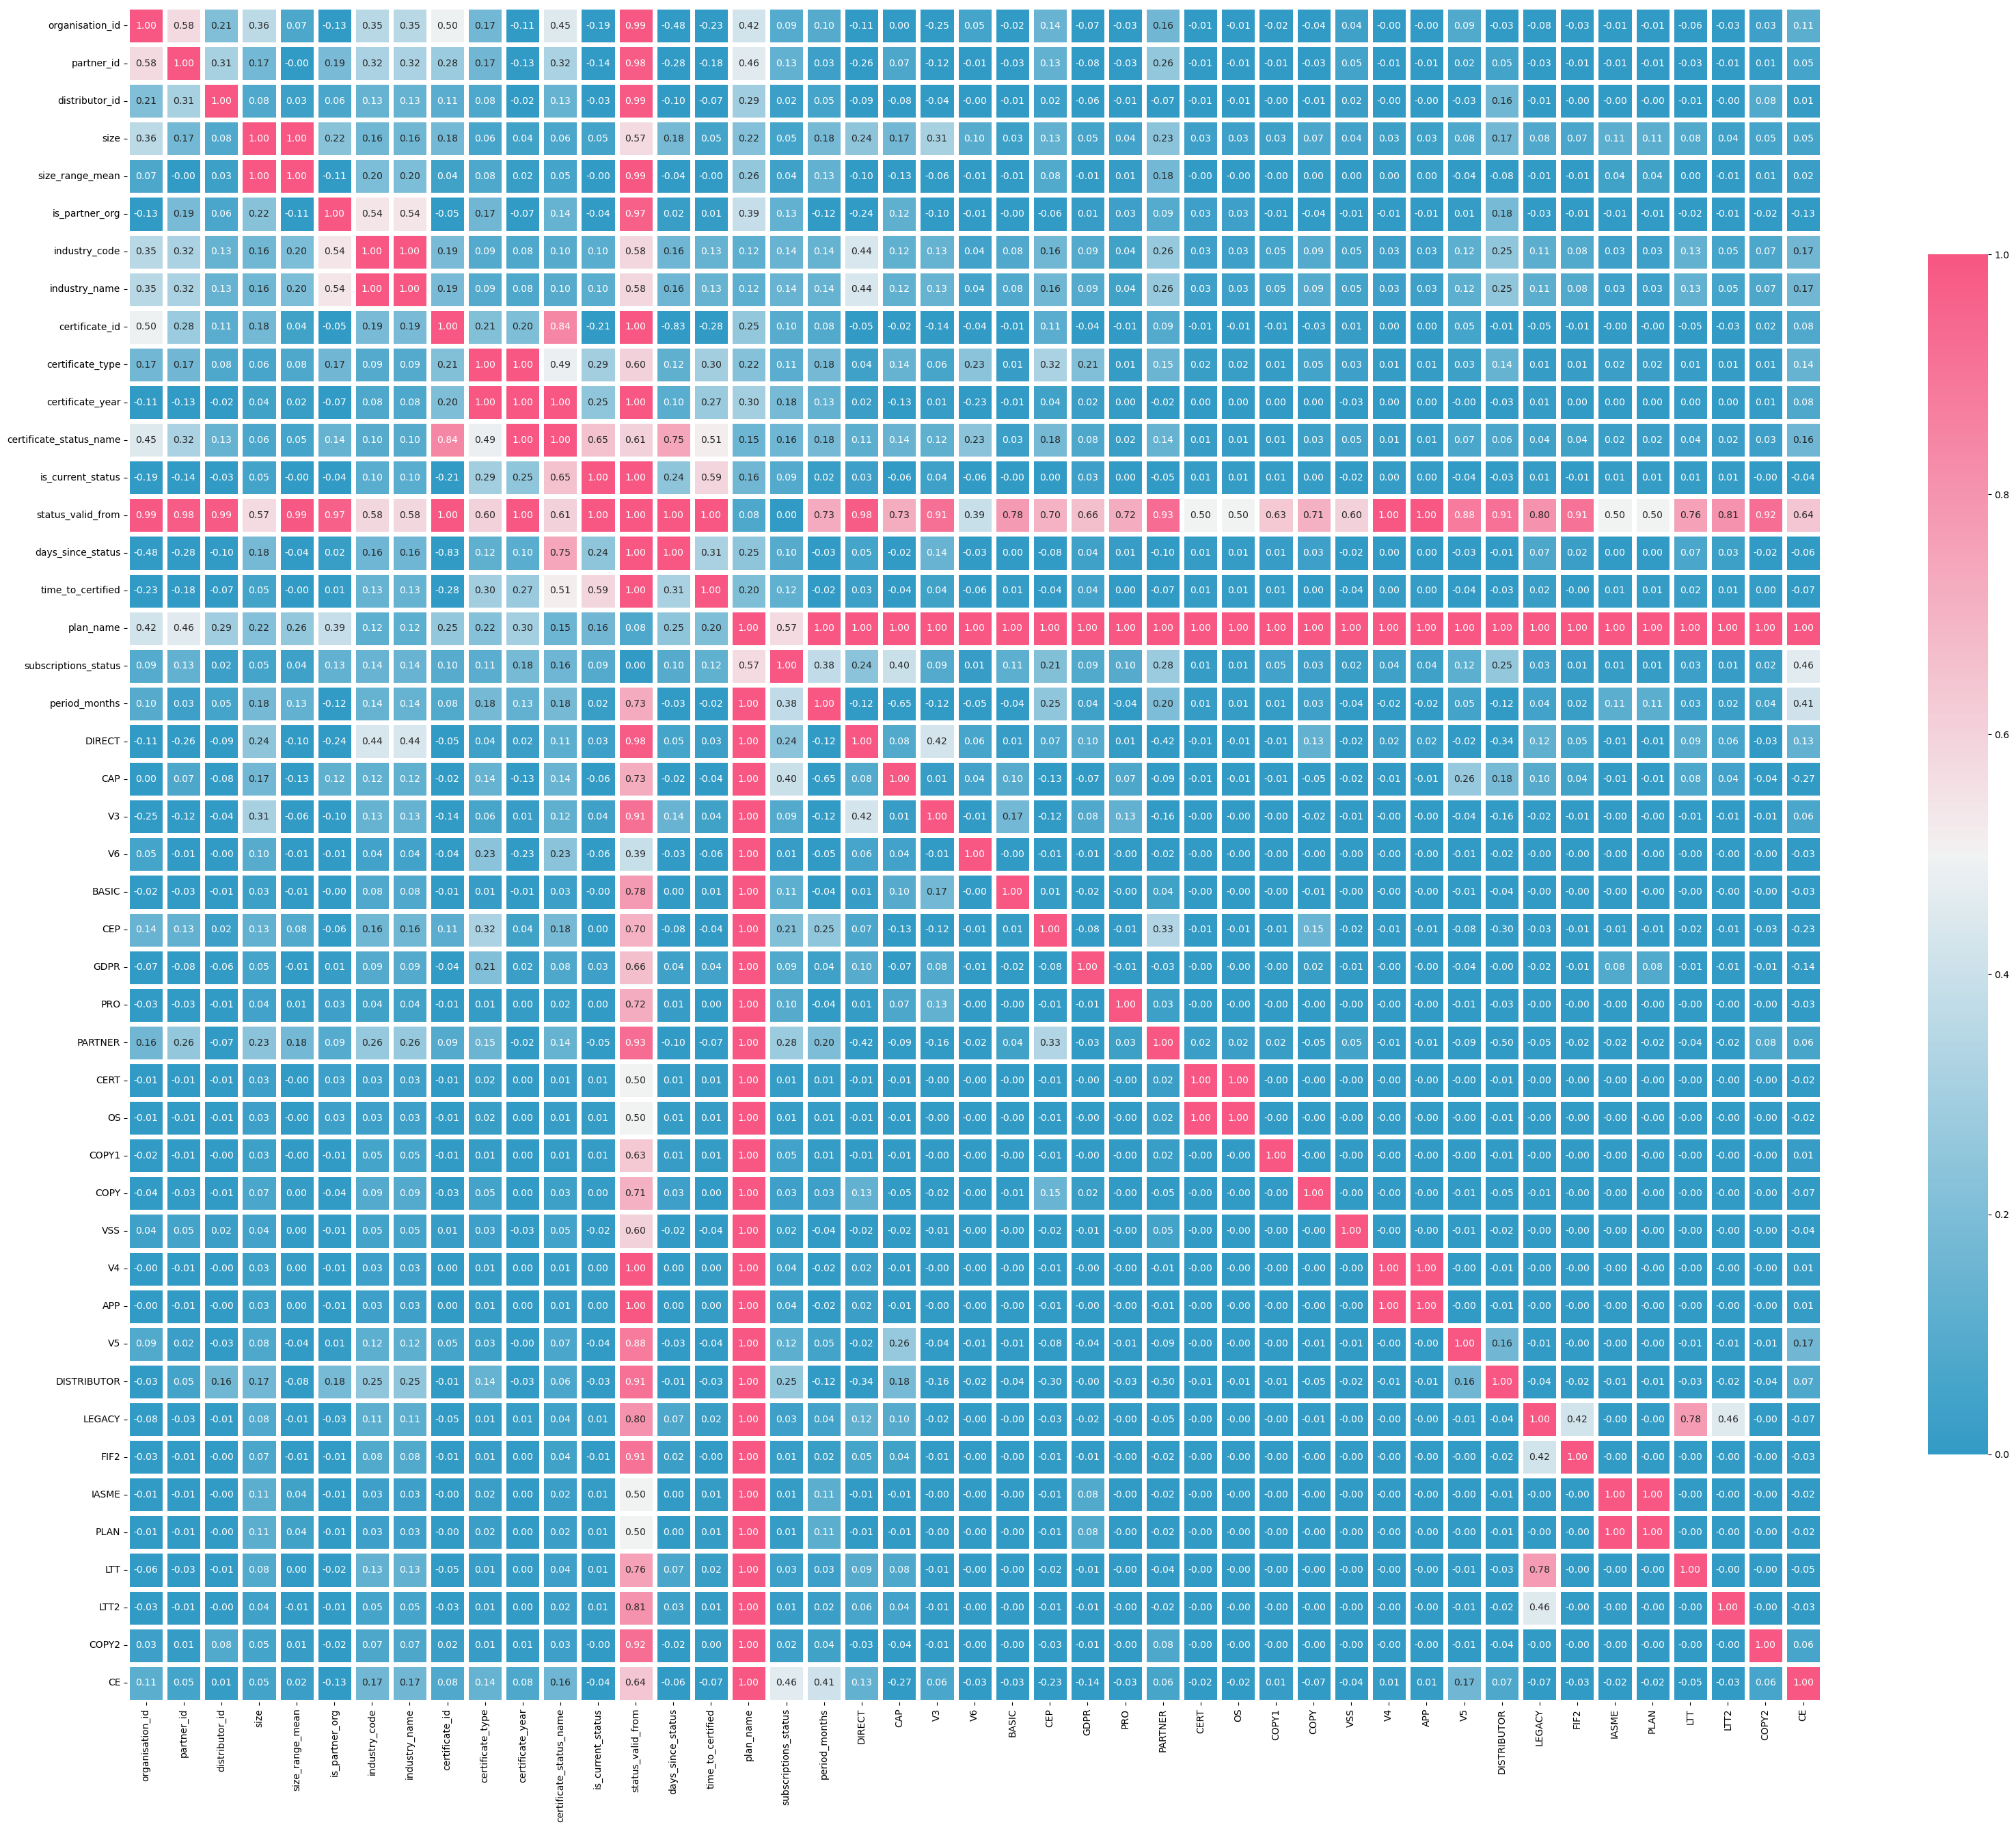

In [30]:
# 使用Seaborn库绘制相关性图
fig, ax = plt.subplots(figsize=(40, 40))
cmap = sns.diverging_palette(230, 0, 90, 60, as_cmap=True)
sns.heatmap(df_complete_corr, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=0, vmax=1, 
           cbar_kws={"shrink": .57}, square=True)

# 显示图像
plt.show()